In [1]:
import matplotlib.pyplot as plt
import numpy as np



# line plots

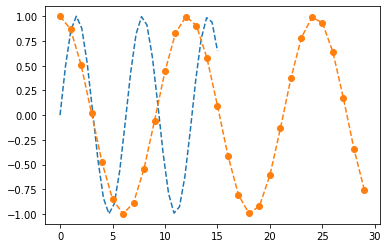

In [2]:
x = np.linspace(0, 15, 30)
y = np.sin(x)
z = np.cos(x)
plt.plot(x, y, "--", z, "o--")
plt.show()

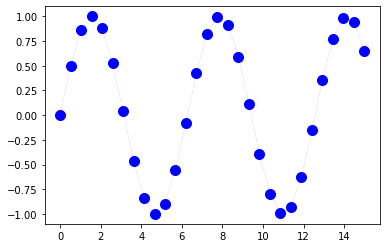

In [3]:
# line width
# marker size (point size)
plt.plot(x, y, "o--", color="blue", linewidth=0.1, markersize=10)
plt.show()

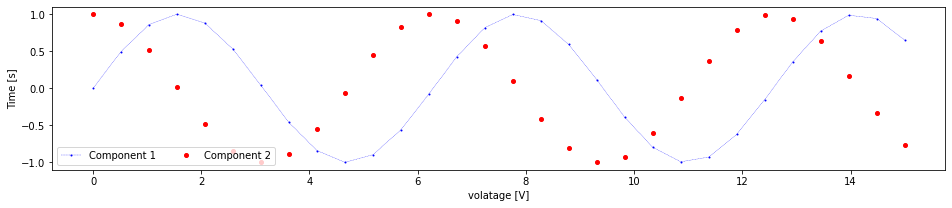

In [4]:
plt.figure(figsize=(16,3)) # change the size of plot

# also shorcuts maybe used like "lw" or "ms" (linewidth, markersize)
plt.plot(x, y, "o--", color="blue", linewidth=0.3, markersize=1, label="Component 1")
plt.plot(x, z, "o", color="red", linewidth=0.3, markersize=4, label="Component 2")

# add labels (popisky)
plt.ylabel("Time [s]") 
plt.xlabel("volatage [V]")

# add legend (also have to specify it in plt.plot())
plt.legend(loc="lower left", fontsize=10, ncol=2) # ncol=number of columns of legned
plt.show()

# histogram

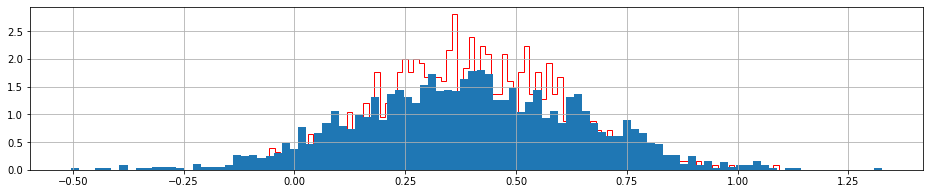

In [5]:
res1 = np.random.randn(1000)*0.2+0.4
res2 = np.random.randn(2000)*0.25+0.4

plt.figure(figsize=(16, 3))

# bins - number of sections on histogram
# normalise - "make the area equal to 1"
# density - normalise bins, so that the overlaping plots are on the same scale
# histtype - change how the histogram is displayed
# plot two histograms agains each other
plt.hist(res1, bins=100, density=True, histtype="step", color="red")
plt.hist(res2, bins=100, density=True)

# make grid (síťová osa)
plt.grid()
plt.show()

# more advanced API

- single axis in 1 figure

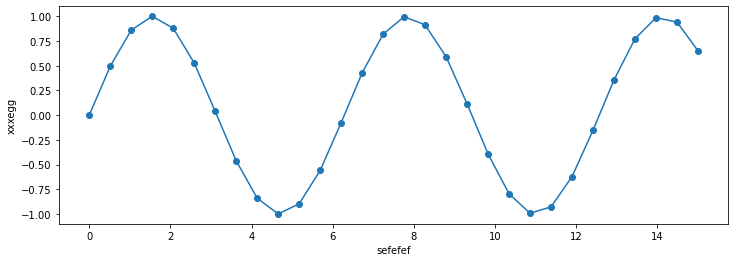

In [6]:
# more axes in one figure

figure, axes_subplot = plt.subplots(nrows=1, ncols=1, figsize=(12,4))
axes_subplot.plot(x, y, "o-")
axes_subplot.set_xlabel("sefefef") # here use set_xlabel instead of x_label
axes_subplot.set_ylabel("xxxegg") # here use set_ylabel instead of y_label
plt.show()

- more axes in one figure

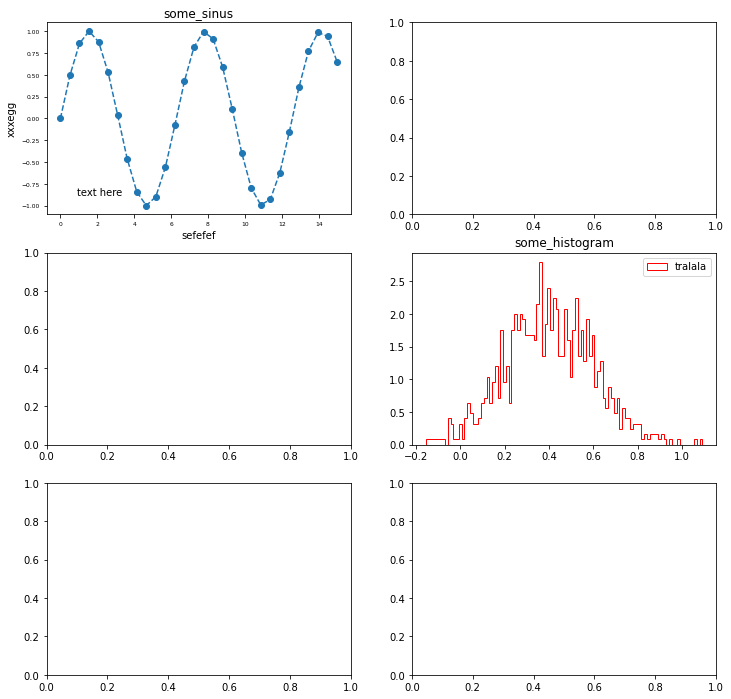

In [7]:
figure, axes_subplot = plt.subplots(nrows=3, ncols=2, figsize=(12,12))

# specify location of each grapgh/plot with index position,
#   because now the complete graph is like an array
topleft = axes_subplot[0][0]
topleft.plot(x, y, "o--")
topleft.set_xlabel("sefefef") # here use set_xlabel instead of x_label
topleft.set_ylabel("xxxegg") # here use set_ylabel instead of y_label
topleft.set_title("some_sinus")
# x, y are taken from the scale, if you want the bottom left corner have coordinates 0,0 use transfrom parameter
topleft.text(x=0.1, y=0.1, s="text here", transform=topleft.transAxes)
topleft.tick_params(axis="both", labelsize=6) # change the size of coordinate labels around the plot

second_right = axes_subplot[1][1]
second_right.hist(res1, bins=100, density=True, histtype="step", color="red", label="tralala")
second_right.legend()
second_right.set_title("some_histogram")
plt.show()


### Example of more proffesional plots

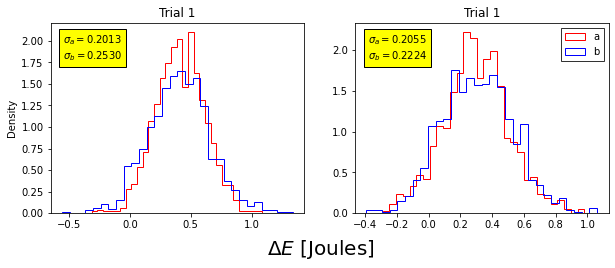

In [8]:
res_a1 = 0.2*np.random.randn(1000)+0.4
res_b1 = 0.25*np.random.randn(1000)+0.4
res_a2 = 0.21*np.random.randn(1000)+0.3
res_b2 = 0.22*np.random.randn(1000)+0.3

textstr1 = "\n".join((r"$\sigma_a=%.4f$" % (np.std(res_a1)), r"$\sigma_b=%.4f$" % (np.std(res_b1))))

textstr2 = "\n".join((r"$\sigma_a=%.4f$" % (np.std(res_a2)), r"$\sigma_b=%.4f$" % (np.std(res_b2))))

fig, axes = plt.subplots(1, 2, figsize=(10, 3.5))

# left plot
ax = axes[0] # we can acces the first plot (top left) by index zero, because the whole graph is one dimensional
ax.hist(res_a1, bins=30, density=True, histtype="step", label="a", color="r")
ax.hist(res_b1, bins=30, density=True, histtype="step", label="b", color="b")
ax.set_title("Trial 1") # set the title name of the plot

# trans axes - makes the text not overlap with curves here
# bbox - add box behind that text
ax.text(0.05, 0.81, textstr1, transform=ax.transAxes, bbox=dict(facecolor="yellow", edgecolor="black"))
ax.set_ylabel("Density")

# right plot
ax = axes[1] 
ax.hist(res_a2, bins=30, density=True, histtype="step", label="a", color="r")
ax.hist(res_b2, bins=30, density=True, histtype="step", label="b", color="b")
ax.text(0.05, 0.81, textstr2, transform=ax.transAxes, bbox=dict(facecolor="yellow", edgecolor="black"))
ax.legend(loc="upper right", fancybox=False, edgecolor="black") # fancy box is just type of box under the text
ax.set_title("Trial 1")

# ha (horizontal alignment)
fig.text(0.5, -0.04, "$\Delta E$ [Joules]", ha="center", fontsize=20) # add label to more plots together 
plt.show()

# 3D on 2D plot, 3D plot and others

In [9]:
_ = np.linspace(-1, 1, 100)
x, y = np.meshgrid(_, _)
z = x**2 + x*y


### filled in contour plots


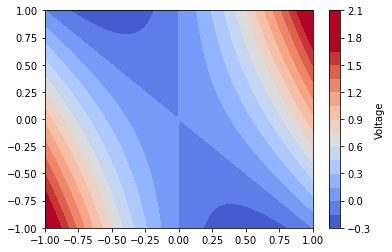

In [10]:
# levels = set depth of displayed levels
# vmin / vmax = everything below or above that limit will have the same color
# cmap = chose colors
plt.contourf(x, y, z, levels=15, vmax=1.68, cmap="coolwarm")
plt.colorbar(label="Voltage")
plt.show()

### contour plot

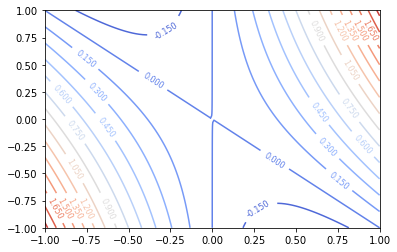

In [11]:
cont_plot = plt.contour(x, y, z, levels=15, cmap="coolwarm")
plt.clabel(cont_plot, fontsize=8) # pass a instance of plot here to get labels for each line (level)
plt.show()

### 3D surface plot

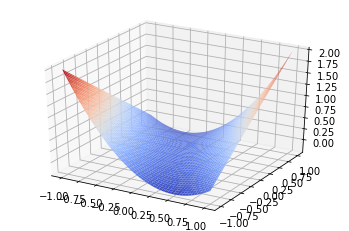

In [12]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x, y, z, cmap="coolwarm")
plt.show()

### streamplot

In [13]:
w = 3
_ = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(_, _)
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U**2 + V**2)

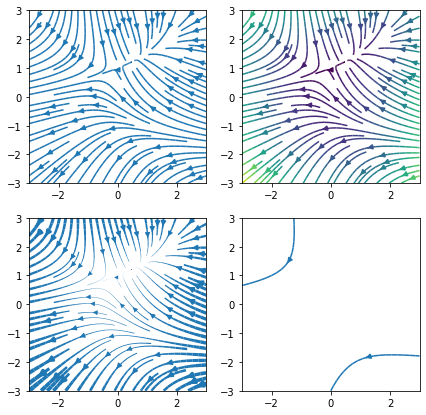

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(7, 7))
line_width = 5*speed/speed.max()
seed_points = np.array([[-2, 1], [0, -3]])

ax = axes[0][0]
ax.streamplot(X, Y, U, V)

ax = axes[0][1]
ax.streamplot(X, Y, U, V, color=speed)

ax = axes[1][0]
ax.streamplot(X, Y, U, V, linewidth=line_width)

ax = axes[1][1]
ax.streamplot(X, Y, U, V, start_points=seed_points) # check flow based on given starting position

plt.show()

# image reading

In [15]:
"""
im = plt.imread("image_name.png")
plt.imgshow(img)
"""

'\nim = plt.imread("image_name.png")\nplt.imgshow(img)\n'

# animations
animations require relating the time fram of your problem to the frame of the animation, then specifying the frames per second

When you do animation, I should always be similar to this

In [16]:
# example of sin wave moving 3 m/s. Translate this into animation

def f(x, t):
  return np.sin(x-3*t)

x = np.linspace(0, 10*np.pi, 1000)


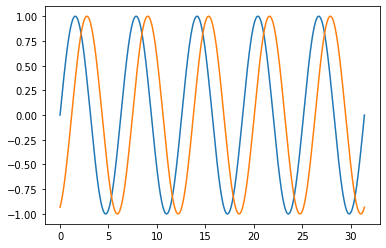

In [17]:
# you can see that adjusting paramter t moves the wave to the right. Lets create
#   an animation out of this
plt.plot(x, f(x=x, t=0))
plt.plot(x, f(x=x, t=0.4))
plt.show()

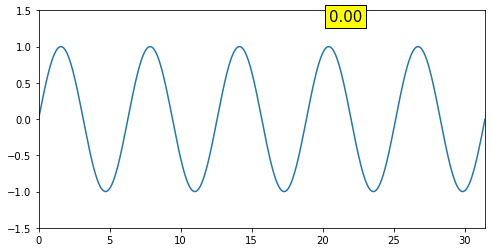

In [18]:
from matplotlib import animation
from matplotlib.animation import PillowWriter

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ln1, = plt.plot([], [])  # comma has to be here, else it does not work. Why???
time_text = ax.text(0.65, 0.95, "", fontsize=15, transform=ax.transAxes,
                    bbox=dict(facecolor="yellow", edgecolor="black"))

ax.set_xlim(0, 10*np.pi) # adjust the scale on y axis (ruller on the left side)
ax.set_ylim(-1.5, 1.5)  # adjust the cale on x axis (ruller on the bottom)

def animate(i):
  ln1.set_data(x, f(x, 1/30*i)) # 1/30*i = increment parameter 't' every second (30frames/sec) by 1
  time_text.set_text(f"{i/50:.2f}")

anim = animation.FuncAnimation(fig, animate, frames=240, interval=50)
anim.save("animation.gif", writer="pillow", fps=50, dpi=100)

### animate in 3D

In [19]:
_ = np.linspace(-1, 1, 100)
x, y = np.meshgrid(_, _)
z = x**2 + x*y


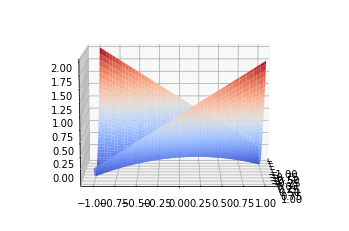

In [20]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x, y, z, cmap="coolwarm", linewidth=0, antialiased=True)

# elev = elevation [degrees]
# azim = azimud? [degrees]
ax.view_init(elev=10, azim=0) # inital veiwing angle

def animate(i):
  ax.view_init(elev=10, azim=3*i) # every frame, the results moves 3 degrees around vertical axis

ani = animation.FuncAnimation(fig, animate, frames=120, interval=50)
ani.save("animation3D.gif", writer="pillow", fps=30, dpi=100)

# Another matplotlib material source:


# line plots

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


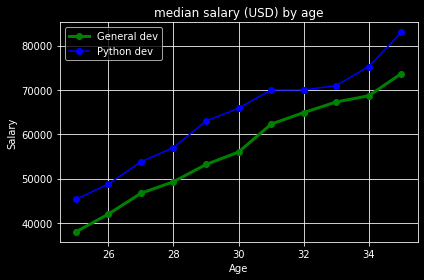

In [21]:
from matplotlib.markers import MarkerStyle
# compare salary of developers according to their age

# if you want to use style (colors, fonts etc) for your plot, then use:
print(plt.style.available)
plt.style.use("dark_background")


dev_age = list(range(25, 36))
dev_salary = [38000, 42000, 46700, 49300, 53200, 56000, 62300, 64900, 67300, 68700, 73700]
python_salary = [45300, 48800, 53800, 57000, 63000, 65900, 70000, 70000, 71000, 75300, 83000]

# for color use formated string (more info in plt doc) [marker type][line type][color]
plt.plot(dev_age, dev_salary, "o-g", label="General dev", linewidth=3)
# also it is possible to write type/color of line with separated parameters
plt.plot(dev_age, python_salary, marker="o", linestyle="-", color="b", label="Python dev")
plt.title("median salary (USD) by age")
plt.xlabel("Age")
plt.ylabel("Salary")
# plt.legend(("General_dev", "Python_dev")) # Names have to be added in oright order
plt.legend() # add label parameter into plots above, in order for this to work
plt.tight_layout() # could fix some padding issues
plt.grid()
plt.show()

### line plots - filling area

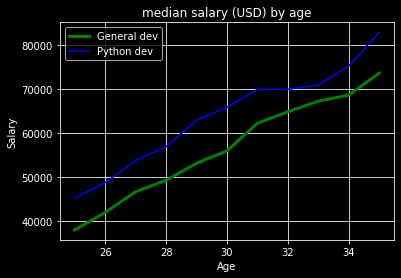

In [22]:
plt.plot(dev_age, dev_salary, label="General dev", linewidth=3, color="g")
plt.plot(dev_age, python_salary, color="b", label="Python dev")
plt.title("median salary (USD) by age")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend() # add label parameter into plots above, in order for this to work
plt.grid()
plt.show()

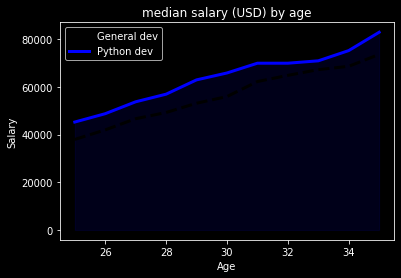

In [23]:
### fill entire area under 'python dev' line
plt.plot(dev_age, dev_salary, linestyle="--", color="black", label="General dev", linewidth=3)
plt.plot(dev_age, python_salary, color="b", label="Python dev", linewidth=3)
plt.title("median salary (USD) by age")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.fill_between(dev_age,
                 python_salary,
                 color="b",
                 alpha=0.1  # adjust visibility of fill between
                 )
plt.legend() # add label parameter into plots above, in order for this to work
plt.show()

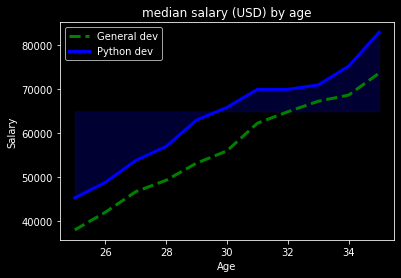

In [24]:
MEDIAN = 65_000

plt.plot(dev_age, dev_salary, linestyle="--", color="g", label="General dev", linewidth=3)
plt.plot(dev_age, python_salary, color="b", label="Python dev", linewidth=3)
plt.title("median salary (USD) by age")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.fill_between(dev_age,
                 python_salary,
                 MEDIAN,
                 color="b",
                 alpha=0.2  # adjust visibility of fill between
                 )
plt.legend() # add label parameter into plots above, in order for this to work
plt.show()

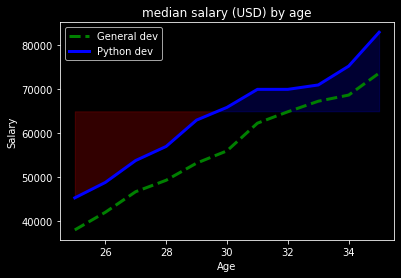

In [25]:
MEDIAN = 65_000

plt.plot(dev_age, dev_salary, linestyle="--", color="g", label="General dev", linewidth=3)
plt.plot(dev_age, python_salary, color="b", label="Python dev", linewidth=3)
plt.title("median salary (USD) by age")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.fill_between(dev_age,
                 python_salary,
                 MEDIAN,
                 color="b",
                 interpolate=True, # (prevents clipping of data interesctions...acordingly)
                 where=(np.array(python_salary) > MEDIAN), # make condition for "fill_between"
                 alpha=0.2  # adjust visibility of fill between
                 )
plt.fill_between(dev_age,
                 python_salary,
                 MEDIAN,
                 color="r",
                 interpolate=True, # (prevents clipping of data interesctions...acordingly)
                 where=(np.array(python_salary) <= MEDIAN), # make condition for "fill_between"
                 alpha=0.2  # adjust visibility of fill between
                 )

plt.legend() # add label parameter into plots above, in order for this to work
plt.show()

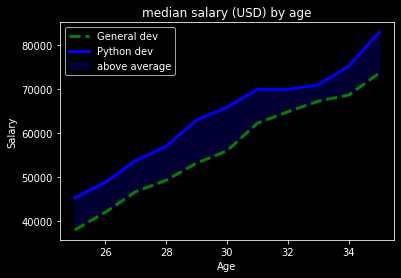

In [26]:

plt.plot(dev_age, dev_salary, linestyle="--", color="g", label="General dev", linewidth=3)
plt.plot(dev_age, python_salary, color="b", label="Python dev", linewidth=3)
plt.title("median salary (USD) by age")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.fill_between(dev_age,
                 python_salary,
                 dev_salary,
                 color="b",
                 interpolate=True, # (prevents clipping of data interesctions...acordingly)
                 where=(np.array(python_salary) > dev_salary), # make condition for "fill_between"
                 alpha=0.2,  # adjust visibility of fill between
                 label="above average")

#plt.fill_between can be also used to display different color when python dev falls below average

plt.legend() # add label parameter into plots above, in order for this to work
plt.show()

# bar charts and analysing data from csv

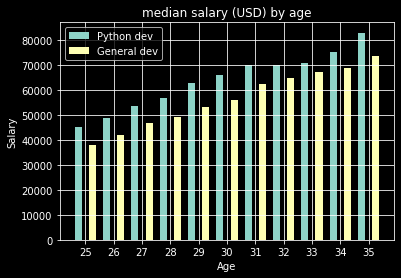

In [27]:
# source data are defined in few cells above
import numpy as np

# to shift bar charts next to each other use numpy to get indexes of age array
# it will however change the scale at the bottom of plot, so it will need to be fiex with x_ticks
age_index = np.arange(len(dev_age))
width_of_bar = 0.25

plt.bar(age_index-width_of_bar, python_salary, width=width_of_bar, label="Python dev")
plt.bar(age_index+width_of_bar, dev_salary, width=width_of_bar, label="General dev")

plt.title("median salary (USD) by age")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.grid()
plt.xticks(ticks=age_index, labels=dev_age)
plt.legend()
plt.show()

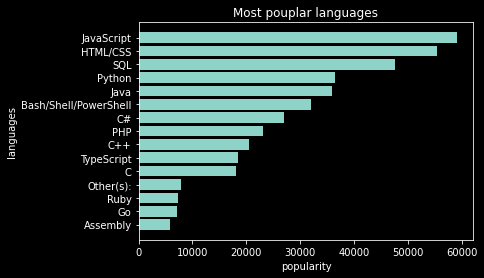

In [28]:
import pandas as pd
from collections import Counter
dataset = pd.read_csv("https://raw.githubusercontent.com/CoreyMSchafer/code_snippets/master/Python/Matplotlib/02-BarCharts/data.csv")
respondent_id = dataset["Responder_id"]
lang_responses = dataset["LanguagesWorkedWith"]

language_counter = Counter()

for response in lang_responses:
  language_counter.update(response.split(";"))

languages = []
popularity = []

for item in language_counter.most_common(15):
  languages.append(item[0])
  popularity.append(item[1])

languages.reverse()  # reverse the dataset, and reverse also the display of graph
popularity.reverse()  # reverse the dataset, and reverse also the display of graph

plt.barh(languages, popularity) # barH stands fro horizontal graph
plt.title("Most pouplar languages")
plt.ylabel("languages")
plt.xlabel("popularity")
plt.show()

# pie charts

do not really use pie chart if there are more than 5-6 items else it gets crowded, else it would be better to use barchart

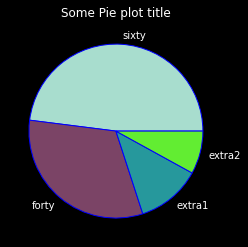

In [29]:
# setting of colors/labels/etc is done with lists for multiple variables
slices = 120, 80, 30, 20
labels = "sixty", "forty", "extra1", "extra2"
# colors = ["grey", "green", "purple", "red"] # can be used with basic color named strings
colors = "#a8ddce","#7b4466","#26989c","#62ed32"

plt.title("Some Pie plot title")

# wdgeproprs = wedge properties (line separators of pie slices)
plt.pie(slices, labels=labels, wedgeprops={"edgecolor": "blue"}, colors=colors)

plt.show()

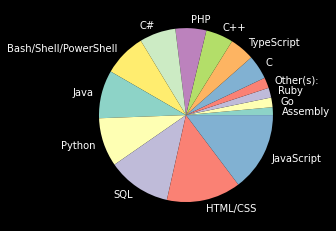

In [30]:
# here is exmple of crowded piechart
plt.pie(popularity, labels=languages)
plt.show()

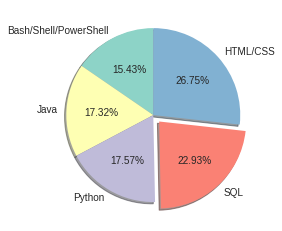

In [31]:
# not it looks better
# use negative indexing because the lists were reveresed few cells above
explode = [0, 0, 0, 0.1, 0] # make one slice stand out (at 0.5 the tip of slice will be at 1/2 of pie radius) 
plt.style.use("seaborn-darkgrid")

plt.pie(popularity[-6:-1],
        labels=languages[-6:-1],
        explode=explode,
        shadow=True, # shadow - make shadow under pie
        startangle=90, # rotate pie from the initial random position
        autopct="%1.2f%%") # display percentage (formated strings are really fucked up here...)

plt.show()

# stack plots

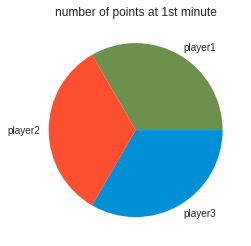

In [32]:
minutes = [1, 2, 3, 4, 5, 6, 7, 8, 9] # just really continuation of time

# numbers at each index position represent number of points the player accumulated throughout a game
#   at a specific minute
player1 = [1, 1, 3, 3, 3, 3, 3, 4, 4]
player2 = [0, 1, 2, 2, 2, 4, 4, 4, 4]
player3 = [0, 1, 1, 1, 2, 2, 3, 4, 5]

labels = ['player1', 'player2', 'player3']
colors = ['#6d904f', '#fc4f30', '#008fd5']

plt.pie([1, 1, 1], labels=labels, colors=colors)
plt.title("number of points at 1st minute")
plt.show()

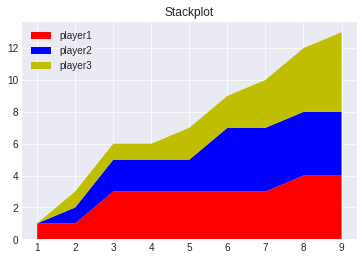

In [33]:
# create actuall stack plot (instead of players filled in individually, you can insert multi-dim array)
labels = ["player1", "player2", "player3"]

plt.stackplot(minutes, player1, player2, player3, labels=labels, colors=["r", "b", "y"])
plt.legend(loc="upper left")
plt.title("Stackplot")
plt.show()

# histograms

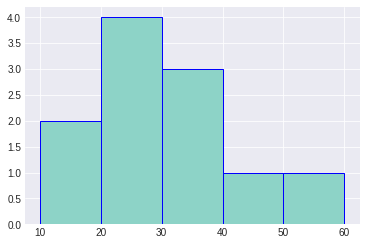

In [34]:
ages = [18,19,21,25,26,26,30,32,38,45,55]
bins = [10, 20, 30, 40, 50, 60] # specify how to divide later bins

plt.hist(ages, bins=bins, edgecolor="b")
plt.show()

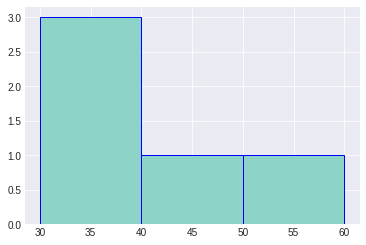

In [35]:
# you can also define even smaller range of bins
bins = [30, 40, 50, 60] # specify how to divide later bins

plt.hist(ages, bins=bins, edgecolor="b")
plt.show()

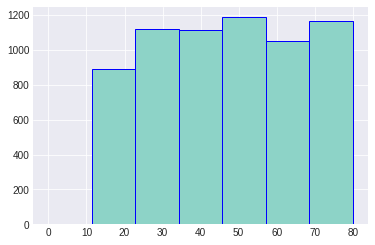

In [36]:
import random

ages = [random.randint(14, 85) for _ in range(7_000)]
bins = np.linspace(0, 80, 8)

plt.hist(ages, bins=bins, edgecolor="blue")
plt.show()

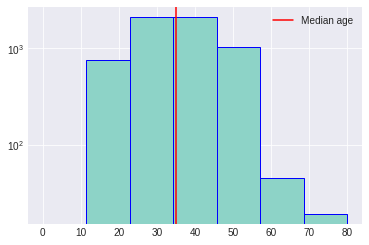

In [37]:
# you can use logarithimc scale also
ages = [random.randint(14, 25) for _ in range(1_000)] \
      + [random.randint(25, 50) for _ in range(5_000)] \
      + [random.randint(50, 75) for _ in range(100)]

plt.hist(ages, bins=bins, edgecolor="blue", log=True)
plt.axvline(35, color="red", label="Median age") # plot vertical line (median value is fictional here)
plt.legend()
plt.show()

# scatterplot

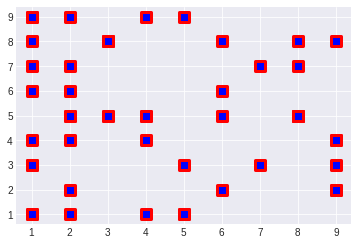

In [38]:
x = [random.randint(1, 9) for _ in range(50)]
y = [random.randint(1, 9) for _ in range(50)]

plt.scatter(x,
            y,
            s=100, # size of markers
            c="blue", # color of markers
            marker="s",  # shape of markers
            edgecolor="red", # edge color of markers
            linewidth=3, # linewidth of edge color of markers
            alpha=1, # set how much faded should the points be, scale - 1.00 (max visibility) 0.00(min visibility) 
            )

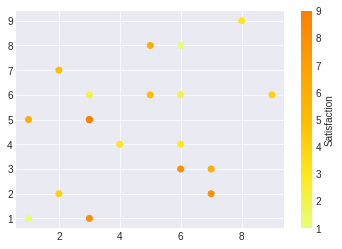

In [39]:
x = [random.randint(1, 9) for _ in range(20)]
y = [random.randint(1, 9) for _ in range(20)]

# the combinations with above data makes no sense, but it is used here to show 
#   that you can use here also lists for colors for each coordinate
colors = [random.randint(1, 9) for _ in range(20)]


plt.scatter(x, y, c=colors, cmap="Wistia")
cbar = plt.colorbar()
cbar.set_label("Satisfaction")
plt.show()

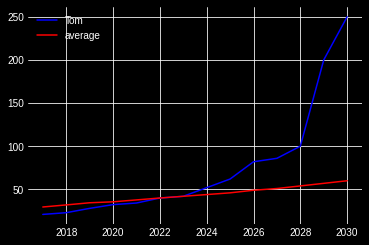

In [40]:
# this is just non relevant easter egg
tom = [21, 23, 28, 32.34, 34.2, 40, 42, 52, 62, 82, 86, 100, 200, 250]
avg = [29.6, 32, 34.5, 35.6, 37.8, 40, 42, 44, 46, 49, 51, 54, 57, 60]
date = [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]

plt.style.use("dark_background")
plt.plot(date, tom, label="Tom", color="b")
plt.plot(date, avg, label="average", color="r")
plt.legend()
plt.show()

# time series data

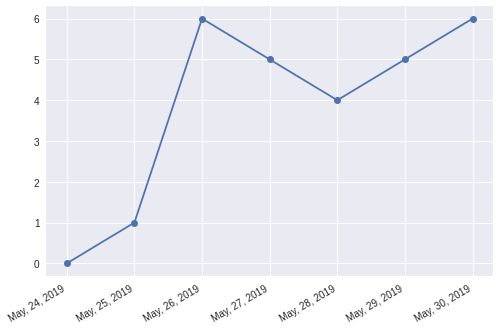

In [41]:
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates

plt.style.use("seaborn")
dates = [
         datetime(2019, 5, 24),
         datetime(2019, 5, 25),
         datetime(2019, 5, 26),
         datetime(2019, 5, 27),
         datetime(2019, 5, 28),
         datetime(2019, 5, 29),
         datetime(2019, 5, 30),
]
y =  [0, 1, 6, 5, 4, 5, 6]

plt.plot_date(dates, y, linestyle="solid")

# folowing code can be only gotten from current plt figure (I dont know why someone made it like this but whateva)
# gcf = get current figure
# autofmt_xdate = automatically format date
plt.gcf().autofmt_xdate() # in this example, it makes the dates little bit rotated for better reading

# change the position of Year/Month/day to desired format
# gca = get current axis (for some reason it has to be called on that one)
date_format = mpl_dates.DateFormatter("%b, %d, %Y") # check the formating in string here in docs, if more interested
plt.gca().xaxis.set_major_formatter(date_format)

plt.show()

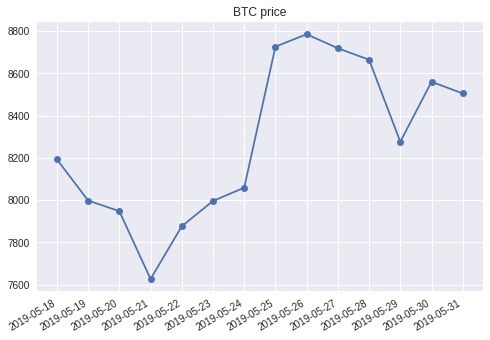

In [42]:
dataset = pd.read_csv("https://raw.githubusercontent.com/CoreyMSchafer/code_snippets/master/Python/Matplotlib/08-TimeSeries/data.csv")

dates = dataset["Date"]
prices_closed = dataset["Close"] # closed price at that day

# sometimes dates data in dataset are in 'string' format not in 'dateformat', meaning it will not be possible
#   to work with them as with dates but only as strings. Pandas has an option how to convert string to date
dataset["Date"] = pd.to_datetime(dataset["Date"])
dataset.sort_values("Date", inplace=True) # sort the dataset by column "Date", inplace=True means perform action directly on the dataset

plt.plot_date(dates, prices_closed, linestyle="solid")
plt.gcf().autofmt_xdate() # format dates on x axis for better readibility

plt.title("BTC price")
plt.show()

# plotting real time data
seems like colab or jupyter in online form do not support this. I tested this in pycharm, and it actually works, so the code I got there.

# Subplots
Some people create subplots even for single plot

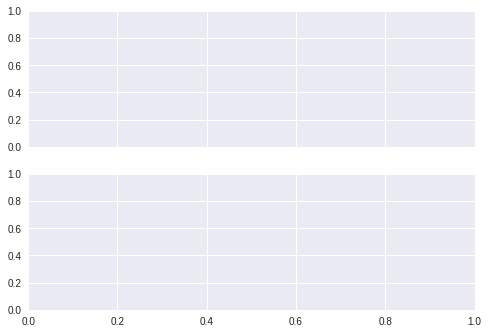

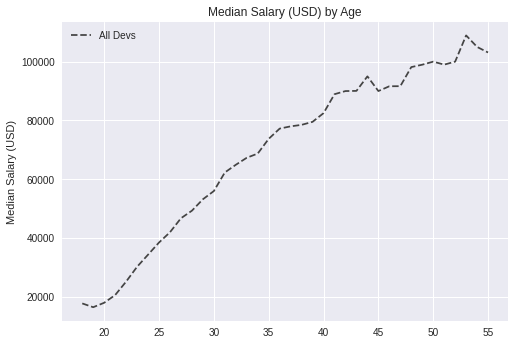

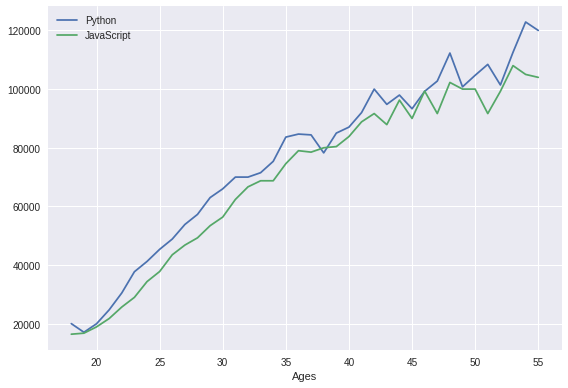

In [43]:
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('seaborn')

data = pd.read_csv('https://raw.githubusercontent.com/CoreyMSchafer/code_snippets/master/Python/Matplotlib/10-Subplots/data.csv')
ages = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']

# here is used list unpacking with (ax1, ax2). 
# It basically takes items from container into variables. 
# sharex, sharey = make ticks the same for all plots
fig1, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False)

# use this if you want to have separated plots (not multiple plots in one huge one)
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

ax1.plot(ages, dev_salaries, color='#444444',
         linestyle='--', label='All Devs')

ax2.plot(ages, py_salaries, label='Python')
ax2.plot(ages, js_salaries, label='JavaScript')

ax1.legend()
ax1.set_title('Median Salary (USD) by Age')
ax1.set_ylabel('Median Salary (USD)')

ax2.legend()
ax2.set_xlabel('Ages')


plt.tight_layout()

plt.show()